In [2]:
# Importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [3]:
# Carregamento de dataset e preparação básica dos dados

df = pd.read_excel("../data/online_retail_II.xlsx", sheet_name="Year 2010-2011")

df_sales = df[(df["Quantity"] >0) & (df["Price"] > 0)].copy()
df_sales["Revenue"] = df_sales["Quantity"] * df_sales["Price"]
                   

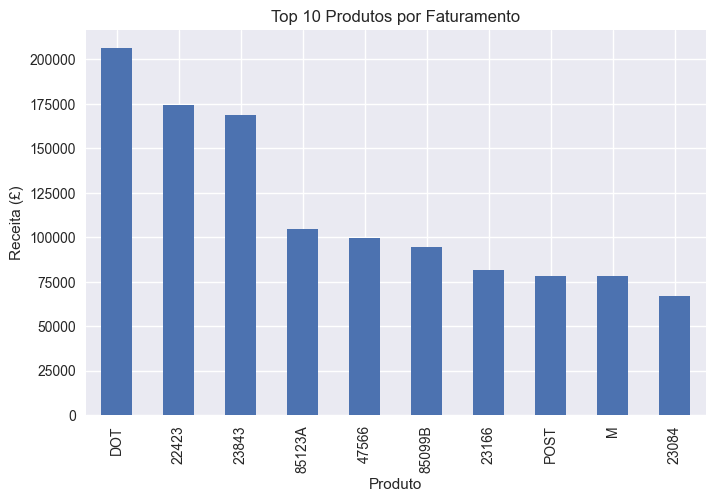

In [7]:
# Top 10 produtos por faturamento

top_products = (
    df_sales
    .groupby("StockCode")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind="bar", figsize=(8,5))
plt.title("Top 10 Produtos por Faturamento")
plt.ylabel("Receita (£)")
plt.xlabel("Produto")
plt.show()

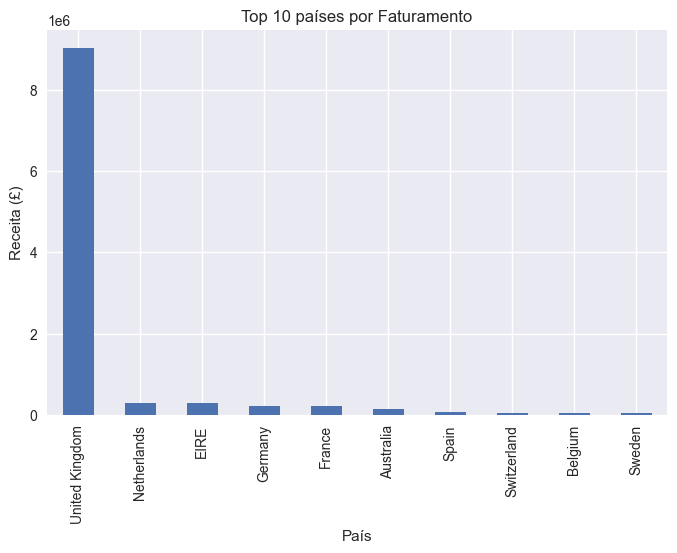

In [9]:
# Top 10 países por faturamento

top_countries = (
    df_sales
    .groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_countries.plot(kind="bar", figsize=(8,5))
plt.title("Top 10 países por Faturamento")
plt.ylabel("Receita (£)")
plt.xlabel("País")
plt.show()

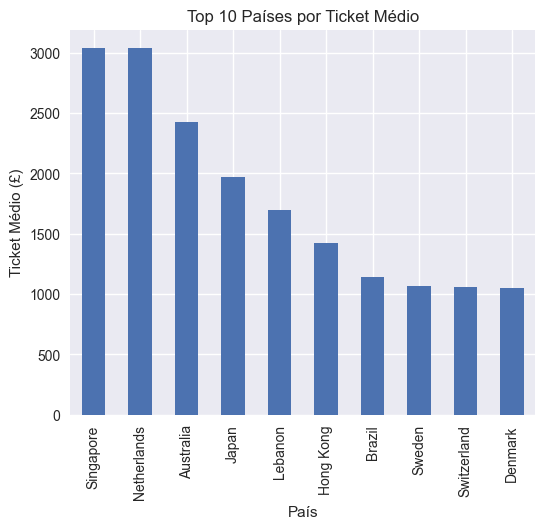

In [14]:
# Ticket médio por país

country_metrics = (
    df_sales
    .groupby("Country")
    .agg(
        total_revenue=("Revenue", "sum"),
        total_orders=("Invoice", "nunique")
    )
)

country_metrics["avg_ticket"] = (
    country_metrics["total_revenue"] / country_metrics["total_orders"]
)

country_metrics["avg_ticket"].sort_values(ascending=False).head(10).plot(
    kind="bar",
    figsize=(6,5)
)

plt.title("Top 10 Países por Ticket Médio")
plt.ylabel("Ticket Médio (£)")
plt.xlabel("País")
plt.show()

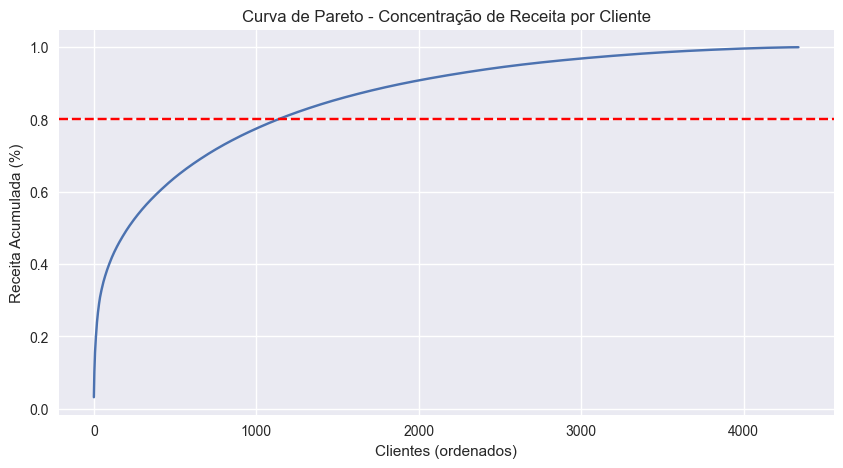

In [16]:
# Curva de Pareto (Cliente)

customer_metrics = (
    df_sales[df_sales["Customer ID"].notna()]
    .groupby("Customer ID")["Revenue"]
    .sum()
    .sort_values(ascending=False)
)

customer_pct = customer_metrics / customer_metrics.sum()
customer_pct_cum = customer_pct.cumsum()

plt.figure(figsize=(10,5))
plt.plot(customer_pct_cum.values)
plt.axhline(0.8, color="red", linestyle="--")
plt.title("Curva de Pareto - Concentração de Receita por Cliente")
plt.ylabel("Receita Acumulada (%)")
plt.xlabel("Clientes (ordenados)")
plt.show()

## Visualizações e Insights-Chave

Os gráficos evidenciam forte concentração de receita por produtos, países e clientes.
Esses padrões evidenciam usar técnicas de mineração de dados nas próximas etapas, especialmente segmentação de clientes e análise de comportamento.